In [1]:
import matplotlib.pyplot as plt

from distributions.sequence import Sequence

from algorithms.full_bandit_exp3 import FullBanditExp3

import numpy as np
import pandas as pd
import seaborn as sns

import pickle
import json

import os

In [2]:
def get_name(run_name):
    return run_name.split("_")[0]

def get_length(run_name):
    return run_name.split("_")[1]

def theoretical_bound(T, sequence: Sequence):
    return 8 * sequence.m * np.sqrt(T * sequence.K * sequence.d * np.log(np.e * sequence.K / sequence.m) * np.log(np.sqrt(T) * sequence.m * sequence.sigma * sequence.R))



In [3]:
sample_sequences = {}
results = {}
distributions = os.listdir(f"output/")
for dist_index, dist in enumerate(distributions):
    results[dist] = {}
    sample_sequences[dist] = {}

    lengths = os.listdir(f"output/{dist}")

    for length_index, length in enumerate(lengths):
        results[dist][length] = {}
        
        with open(f"output/{dist}/{length}/0/sequence.json", "rb") as input_file:
            sample_sequences[dist][length] = pickle.load(input_file)

        algo_names = os.listdir(f"output/{dist}/{length}/0")
        algo_names = np.unique([x.split("_")[0] for x in algo_names])
        algo_names = algo_names[algo_names != "sequence.json"]
        print(algo_names)

        for algo_name in algo_names:
            results[dist][length][algo_name] = {
                "regret": [],
                "gamma": [],
                "time_elapsed": [],
            }

            iterations = os.listdir(f"output/{dist}/{length}/")
            for iteration in iterations:
                with open(f"output/{dist}/{length}/{iteration}/{algo_name}_general_info.json", "r") as input_file:
                    input_dict = json.load(input_file)

                result_buffer = results[dist][length][algo_name]
                result_buffer["regret"].append(input_dict["regret"])
                result_buffer["gamma"].append(input_dict["gamma"])
                result_buffer["time_elapsed"].append(input_dict["time_elapsed"])

for dist_name in results.keys():
    for length in results[dist_name].keys():
        for algo_name in results[dist_name][length].keys():
            for key in results[dist_name][length][algo_name].keys():
                results[dist_name][length][algo_name][key] = np.array(results[dist_name][length][algo_name][key])

['FullBanditExp3Inv' 'NonContextualExp3' 'OnePerContext' 'RealLinExp3'
 'SemiBanditFTRLInv' 'UniformRandom']
['FullBanditExp3Inv' 'NonContextualExp3' 'OnePerContext' 'RealLinExp3'
 'SemiBanditFTRLInv' 'UniformRandom']
['FullBanditExp3Inv' 'NonContextualExp3' 'OnePerContext' 'RealLinExp3'
 'SemiBanditFTRLInv' 'UniformRandom']
['FullBanditExp3Inv' 'NonContextualExp3' 'OnePerContext' 'RealLinExp3'
 'SemiBanditFTRLInv' 'UniformRandom']
['FullBanditExp3Inv' 'NonContextualExp3' 'OnePerContext' 'RealLinExp3'
 'SemiBanditFTRLInv' 'UniformRandom']
['FullBanditExp3Inv' 'NonContextualExp3' 'OnePerContext' 'RealLinExp3'
 'SemiBanditFTRLInv' 'UniformRandom']
['FullBanditExp3Inv' 'NonContextualExp3' 'OnePerContext' 'RealLinExp3'
 'SemiBanditFTRLInv' 'UniformRandom']
['FullBanditExp3Inv' 'NonContextualExp3' 'OnePerContext' 'RealLinExp3'
 'SemiBanditFTRLInv' 'UniformRandom']
['FullBanditExp3Inv' 'NonContextualExp3' 'OnePerContext' 'RealLinExp3'
 'SemiBanditFTRLInv' 'UniformRandom']


In [4]:
for dist in results.keys():
    for length in results[dist].keys():
        algo = FullBanditExp3()
        sequence = sample_sequences[dist][length]
        algo.set_constants(np.random.default_rng(), sample_sequences[dist][length])
        print("\n")
        print(length, "d:", sequence.d, "K:", sequence.actionset.K, "m:", sequence.actionset.m)
        #print(f"{sequence.K}/{algo.beta}*{algo.gamma}*{sequence.lambda_min}")
        print("gamma", results[dist]["100000"]["FullBanditExp3Inv"]["gamma"][0], "M", algo.M)
        for algo_name in results[dist][length].keys():
            single_result = results[dist][length][algo_name]
            print(algo_name, "regret:", np.average(single_result["regret"]), np.std(single_result["regret"]), np.average(single_result["time_elapsed"]))




100000 d: 12 K: 3 m: 1
gamma 0.08073989205311842 M 7350
FullBanditExp3Inv regret: 1376.16 150.42704012244607 13814.61770828247
NonContextualExp3 regret: 3164.28 194.3130505138551 1247.8380892181397
OnePerContext regret: 1510.76 610.1038783682661 1585.9764264011383
RealLinExp3 regret: 2959.52 137.6930266934386 3151.4655682373045
SemiBanditFTRLInv regret: 2608.28 152.2149848076726 2537.454222793579
UniformRandom regret: 3360.36 210.30851242876503 43.69678240776062


100000 d: 12 K: 5 m: 2
gamma 0.2178502392089596 M 9462
FullBanditExp3Inv regret: 4017.2 341.1063177368605 12561.291136922837
NonContextualExp3 regret: 5482.12 341.43196335434095 1923.7083423519134
OnePerContext regret: 3634.24 962.6306157607912 2086.100585632324
RealLinExp3 regret: 5646.0 187.758142300141 3227.795486698151
SemiBanditFTRLInv regret: 5054.84 150.1600958976785 6437.871975154877
UniformRandom regret: 5970.44 222.58662673215565 44.96820595741272


100000 d: 12 K: 8 m: 3
gamma 0.45146520244632127 M 11216
FullBand

OSError: output/BinaryContext1;3_IndependentBernoulli5;3/10000/0/FullBanditExp3Inv_probability_array.csv not found.

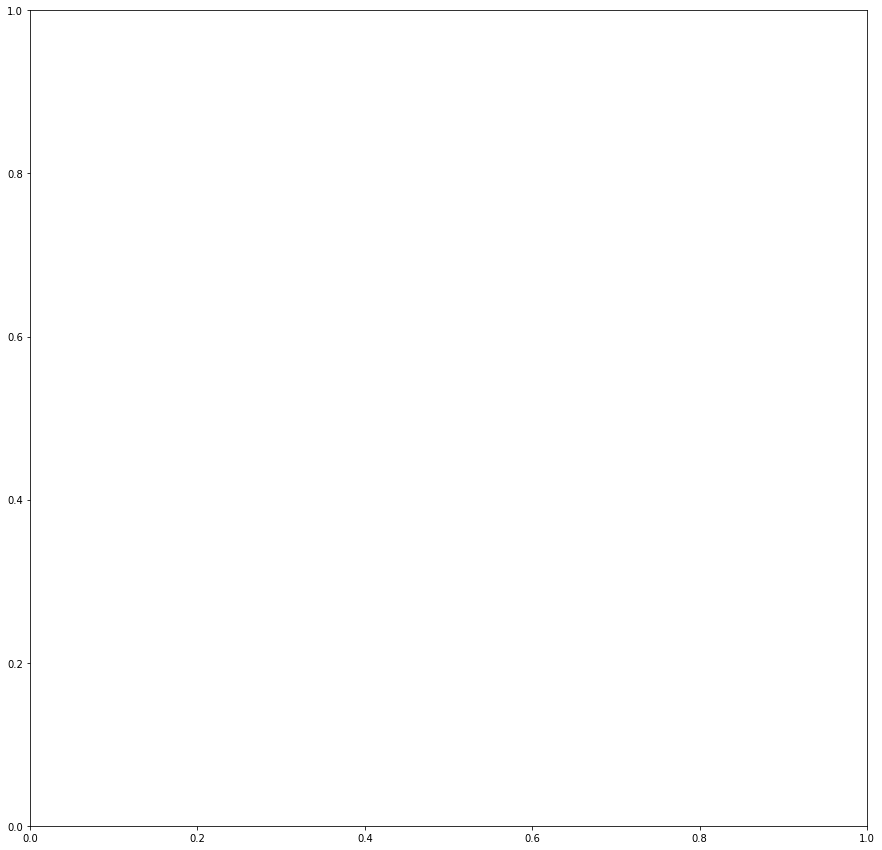

In [5]:
fig, axs = plt.subplots(figsize=(15, 15))

for algo in algo_names:
    data = np.loadtxt(f"output/BinaryContext1;3_IndependentBernoulli5;3/10000/0/{algo}_probability_array.csv")[:, 0]
    axs.plot(data, label=algo)

fig.legend()
fig.show()

In [ ]:
for name in ["FullBanditExp3"]:
    for length in results[name].keys():
        single_result = results[name][length]
        sequence = single_result["sequences"][0]

        theo = theoretical_bound(int(length), sequence)
        print(name, length, "regret:", np.average(single_result["regret"]), f"({theo:.2f})")

        data = single_result["probability_array"][:, :, 0]

        data1 = data[:, sequence.contexts[:-1, 0].astype(bool)]
        data2 = data[:, ~sequence.contexts[:-1, 0].astype(bool)]

        dataframe = pd.DataFrame(data1).melt()
        sns.lineplot(data=dataframe, x="variable", y="value", label="context 1")
        dataframe = pd.DataFrame(data2).melt()
        sns.lineplot(data=dataframe, x="variable", y="value", label="context 2")

